In [107]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Reading Reports

In [108]:
report_path = "./reports2/"
df = pd.DataFrame()

for e in range(200):
    df_e = pd.read_csv(f"./reports2/train_{e}.csv")
    df_e.drop(columns=["Unnamed: 0"], inplace=True)
    df = pd.concat([df, df_e])
    

In [109]:
df

,epoch,batch_id,batch_num,learning_rate,loss_id_x,loss_id_y,loss_identity,loss_gan_y2x,loss_gan_x2y,loss_gan,loss_cycle_x,loss_cycle_y,loss_cycle,loss_generation,loss_disc_real_x,loss_disc_fake_x,loss_disc_real_y,loss_disc_fake_y,loss_disc
0,0.0,0.0,16.0,0.000200,0.638791,0.544965,0.591878,1.984908,3.496105,2.740507,0.654455,0.558455,0.606455,11.764446,1.983002,1.114259,3.692217,1.474234,2.065928
1,0.0,1.0,16.0,0.000200,0.538609,0.524649,0.531629,1.624361,1.799656,1.712008,0.598442,0.550666,0.574554,10.115691,2.452915,2.022742,2.114172,1.299614,1.972360
2,0.0,2.0,16.0,0.000200,0.484807,0.448009,0.466408,2.405865,3.198444,2.802155,0.525303,0.492029,0.508666,10.220854,2.115466,2.402331,2.437237,3.270213,2.556312
3,0.0,3.0,16.0,0.000200,0.427249,0.425684,0.426467,1.693061,2.727091,2.210076,0.488093,0.501169,0.494631,9.288719,1.383180,1.392596,1.886514,2.690811,1.838275
4,0.0,4.0,16.0,0.000200,0.396537,0.461143,0.428840,1.314385,1.110496,1.212440,0.457469,0.467328,0.462398,7.980621,1.263898,1.101092,1.329813,1.236593,1.232849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,199.0,62.0,16.0,0.000002,0.047535,0.067739,0.057637,0.462006,0.492343,0.477174,0.076511,0.088994,0.082753,1.592885,0.109270,0.139898,0.129810,0.103442,0.120605
63,199.0,63.0,16.0,0.000002,0.055218,0.071310,0.063264,0.395716,0.507001,0.451358,0.089506,0.090412,0.089959,1.667265,0.196062,0.142286,0.129486,0.112787,0.145155
64,199.0,64.0,16.0,0.000002,0.047965,0.066633,0.057299,0.416771,0.495520,0.456146,0.077155,0.086131,0.081643,1.559071,0.186681,0.168867,0.112909,0.102439,0.142724
65,199.0,65.0,16.0,0.000002,0.060199,0.068984,0.064591,0.459473,0.490232,0.474852,0.095598,0.091369,0.093483,1.732643,0.183161,0.108395,0.129434,0.121292,0.135570


# Losses

In [110]:
df_loss = df[["epoch", "batch_id", "loss_identity", "loss_cycle", "loss_generation", "loss_gan", "loss_disc"]]
df_loss

,epoch,batch_id,loss_identity,loss_cycle,loss_generation,loss_gan,loss_disc
0,0.0,0.0,0.591878,0.606455,11.764446,2.740507,2.065928
1,0.0,1.0,0.531629,0.574554,10.115691,1.712008,1.972360
2,0.0,2.0,0.466408,0.508666,10.220854,2.802155,2.556312
3,0.0,3.0,0.426467,0.494631,9.288719,2.210076,1.838275
4,0.0,4.0,0.428840,0.462398,7.980621,1.212440,1.232849
...,...,...,...,...,...,...,...
62,199.0,62.0,0.057637,0.082753,1.592885,0.477174,0.120605
63,199.0,63.0,0.063264,0.089959,1.667265,0.451358,0.145155
64,199.0,64.0,0.057299,0.081643,1.559071,0.456146,0.142724
65,199.0,65.0,0.064591,0.093483,1.732643,0.474852,0.135570


In [111]:
df_loss_epoch = df_loss.groupby(by="epoch")
df_loss_epoch = df_loss_epoch.sum() / df_loss_epoch.count()
df_loss_epoch.drop(columns=["batch_id"], inplace=True)
df_loss_epoch

,loss_identity,loss_cycle,loss_generation,loss_gan,loss_disc
epoch,,,,,
0.0,0.282103,0.305924,5.191882,0.722123,0.617087
1.0,0.219967,0.244036,3.979584,0.439383,0.271853
2.0,0.205319,0.228849,3.760878,0.445797,0.246459
3.0,0.198419,0.218994,3.639336,0.457300,0.230020
4.0,0.188911,0.208696,3.486225,0.454706,0.221042
...,...,...,...,...,...
195.0,0.060620,0.086840,1.636865,0.465364,0.134577
196.0,0.060628,0.086837,1.635899,0.464393,0.134147
197.0,0.060585,0.086774,1.635121,0.464455,0.134063


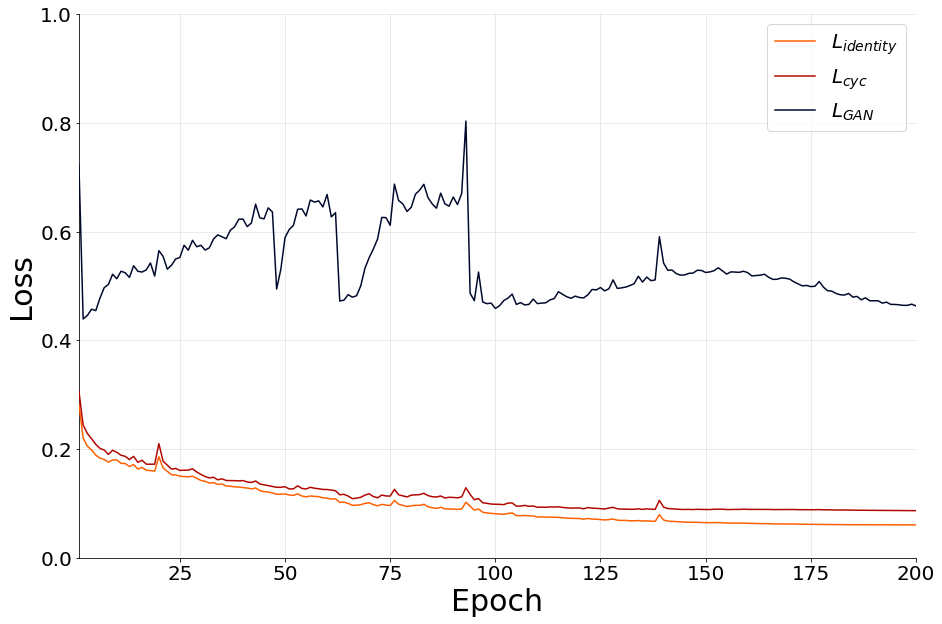

In [112]:
epochs = [e for e in range(1, 201)]

# ax = df_loss_epoch.plot(figsize=(15,10), zorder=5)
plt.figure(figsize=(15, 10))
ax = plt.gca()

ax.plot(epochs, df_loss_epoch["loss_identity"].tolist(), label="$L_{identity}$", color="#FF5F00", zorder=5)
plt.plot(epochs, df_loss_epoch["loss_cycle"].tolist(), label="$L_{cyc}$", color="#B20600", zorder=5)
plt.plot(epochs, df_loss_epoch["loss_gan"].tolist(), label="$L_{GAN}$", color="#00092C", zorder=5)



ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(fontsize=20)
plt.xlabel("Epoch", fontsize=30)
plt.ylabel("Loss", fontsize=30)

plt.xlim([1,200])
plt.ylim([0,1])

plt.xticks(size=20)
plt.yticks(size=20)

plt.grid(zorder=0, alpha=0.3)

plt.savefig("../plots/training/generator_losses.png")

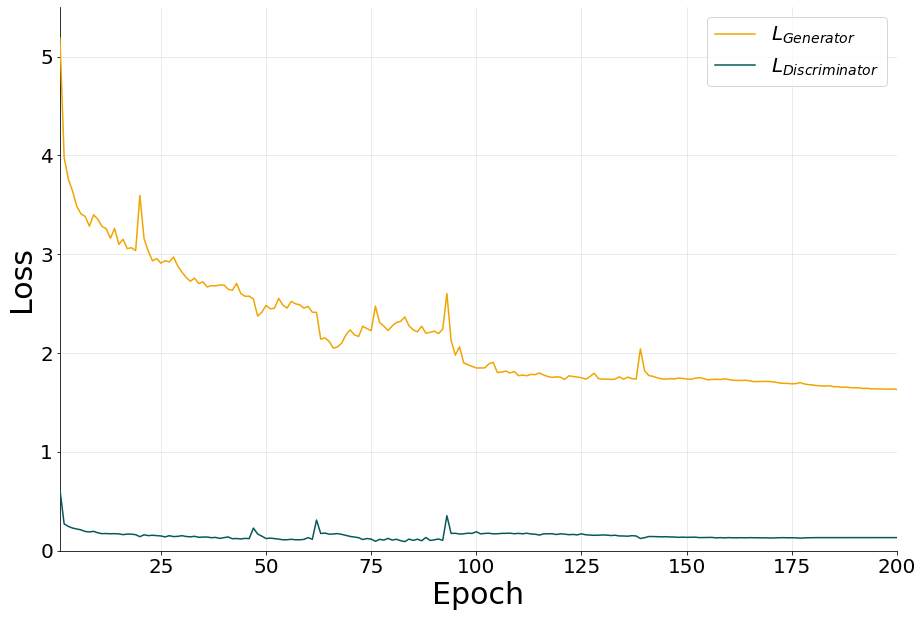

In [113]:
epochs = [e for e in range(1, 201)]

# ax = df_loss_epoch.plot(figsize=(15,10), zorder=5)
plt.figure(figsize=(15, 10))
ax = plt.gca()

plt.plot(epochs, df_loss_epoch["loss_generation"].tolist(), label="$L_{Generator}$", color="#F0A500", zorder=5)
plt.plot(epochs, df_loss_epoch["loss_disc"].tolist(), label="$L_{Discriminator}$", color="#05595B", zorder=5)



ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(fontsize=20)
plt.xlabel("Epoch", fontsize=30)
plt.ylabel("Loss", fontsize=30)

plt.xlim([1,200])
plt.ylim([0,5.5])

plt.xticks(size=20)
plt.yticks(size=20)

plt.grid(zorder=0, alpha=0.3)

plt.savefig("../plots/training/gen_disc_losses.png")

# Learning Rate

In [114]:
df_epoch_lr = df[["epoch", "learning_rate"]].groupby(by="epoch").first()

df_epoch_lr 

,learning_rate
epoch,
0.0,0.000200
1.0,0.000200
2.0,0.000200
3.0,0.000200
4.0,0.000200
...,...
195.0,0.000010
196.0,0.000008
197.0,0.000006


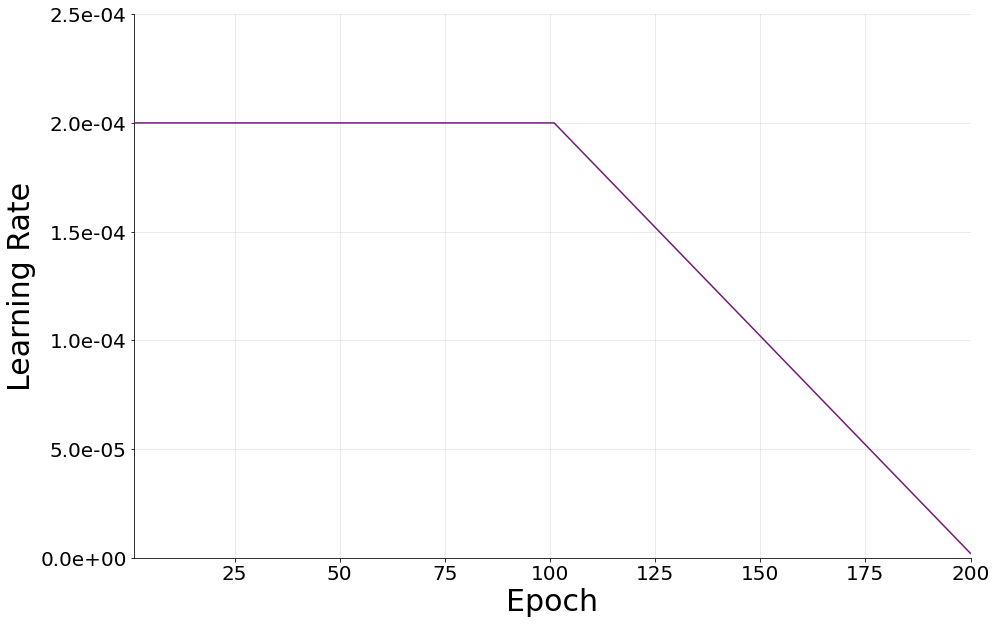

In [115]:
epochs = [e for e in range(1, 201)]

# ax = df_loss_epoch.plot(figsize=(15,10), zorder=5)
plt.figure(figsize=(15, 10))
ax = plt.gca()

plt.plot(epochs, df_epoch_lr["learning_rate"].tolist(), label="Learning Rate", color="#711A75", zorder=5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ax.legend(fontsize=20)
plt.xlabel("Epoch", fontsize=30)
plt.ylabel("Learning Rate", fontsize=30)

plt.xlim([1,200])
plt.ylim([0,25e-5])

plt.xticks(size=20)
plt.yticks(size=20)

ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))

plt.grid(zorder=0, alpha=0.3)

plt.savefig("../plots/training/learning_rate.png")